In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [6]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [7]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [8]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [9]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [10]:
car['Price']=car['Price'].str.replace(',','').astype(int)

converting price in rupees to dollars

In [11]:
# Convert the 'Price' column from rupees to dollars using the conversion rate 1 dollar = 82 rupees
conversion_rate = 82
car['Price'] = (car['Price'] / conversion_rate).astype(int)

####  kms_driven has object values with kms at last.

In [12]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

# car['kms_driven'] = car['kms_driven'].str.replace(',', '').str.extract('(\d+)').astype(float)

Convert kms_driven to miles_driven

#### It has nan values and two rows have 'Petrol' in them

In [13]:
car=car[car['kms_driven'].str.isnumeric()]

In [14]:
car['kms_driven']=car['kms_driven'].astype(int)

In [15]:
# Convert kilometers to miles using the conversion rate 1 kilometer = 0.621371 miles
conversion_rate_km_to_miles = 0.621371
car['miles_driven'] = (car['kms_driven'] * conversion_rate_km_to_miles).astype(int)
car = car.drop('kms_driven', axis=1)
print(car)


                                       name   company  year  Price fuel_type  \
0      Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007    975    Petrol   
1                   Mahindra Jeep CL550 MDI  Mahindra  2006   5182    Diesel   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014   3963    Petrol   
4          Ford EcoSport Titanium 1.5L TDCi      Ford  2014   7012    Diesel   
6                                 Ford Figo      Ford  2012   2134    Diesel   
..                                      ...       ...   ...    ...       ...   
883              Maruti Suzuki Ritz VXI ABS    Maruti  2011   3292    Petrol   
885               Tata Indica V2 DLE BS III      Tata  2009   1341    Diesel   
886                    Toyota Corolla Altis    Toyota  2009   3658    Petrol   
888                     Tata Zest XM Diesel      Tata  2018   3170    Diesel   
889                      Mahindra Quanto C8  Mahindra  2013   4756    Diesel   

     miles_driven  
0           27961  

#### fuel_type has nan values

In [16]:
car=car[~car['fuel_type'].isna()]

In [17]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [18]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [19]:
car=car.reset_index(drop=True)

## Cleaned Data

In [20]:
car

,name,company,year,Price,fuel_type,miles_driven
0,Hyundai Santro Xing,Hyundai,2007,975,Petrol,27961
1,Mahindra Jeep CL550,Mahindra,2006,5182,Diesel,24
2,Hyundai Grand i10,Hyundai,2014,3963,Petrol,17398
3,Ford EcoSport Titanium,Ford,2014,7012,Diesel,22369
4,Ford Figo,Ford,2012,2134,Diesel,25476
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,3292,Petrol,31068
812,Tata Indica V2,Tata,2009,1341,Diesel,18641
813,Toyota Corolla Altis,Toyota,2009,3658,Petrol,82020
814,Tata Zest XM,Tata,2018,3170,Diesel,16777


In [21]:
car.to_csv('Cleaned_Car_data.csv')

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          816 non-null    object
 1   company       816 non-null    object
 2   year          816 non-null    int64 
 3   Price         816 non-null    int64 
 4   fuel_type     816 non-null    object
 5   miles_driven  816 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [23]:
car.describe(include='all')

,name,company,year,Price,fuel_type,miles_driven
count,816,816,816.000000,816.000000,816,816.000000
unique,254,25,NaN,NaN,3,NaN
top,Maruti Suzuki Swift,Maruti,NaN,NaN,Petrol,NaN
freq,51,221,NaN,NaN,428,NaN
mean,NaN,NaN,2012.444853,5020.471814,NaN,28753.794118
std,NaN,NaN,4.002992,5794.936628,NaN,21311.430658
min,NaN,NaN,1995.000000,365.000000,NaN,0.000000
25%,NaN,NaN,2010.000000,2134.000000,NaN,16777.000000
50%,NaN,NaN,2013.000000,3658.000000,NaN,25476.000000
75%,NaN,NaN,2015.000000,5990.250000,NaN,35304.750000


In [24]:
car=car[car['Price']<73000]

### Checking relationship of Company with Price

In [25]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [26]:
import seaborn as sns

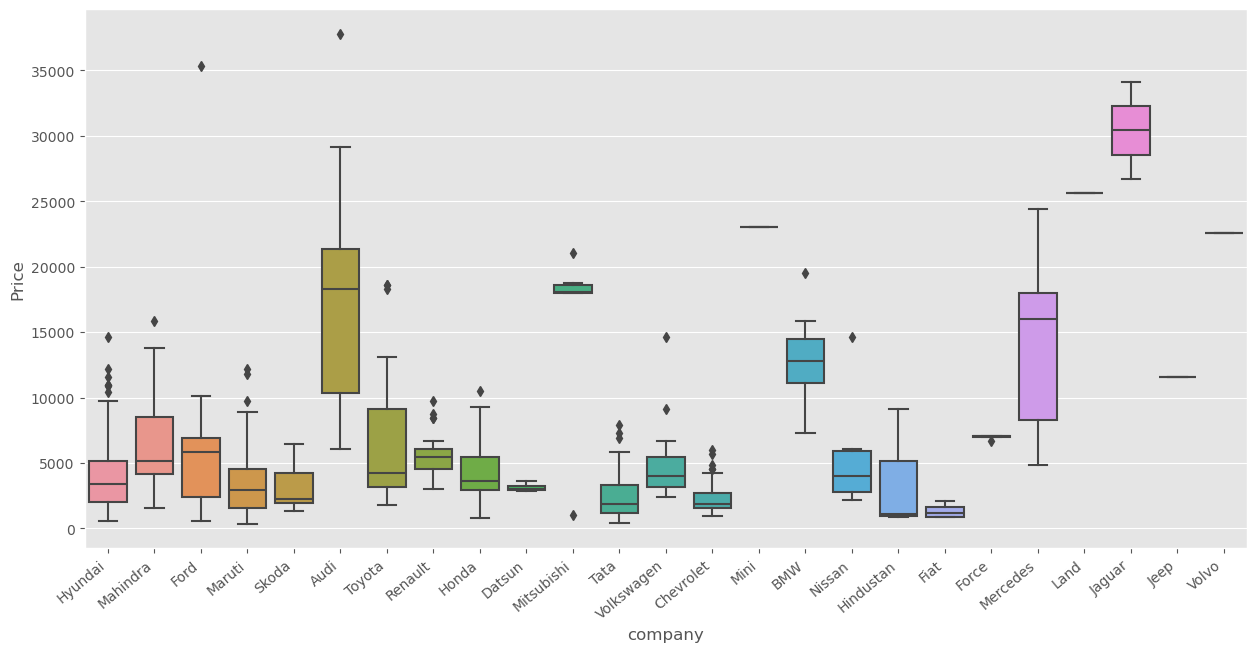

In [27]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

/Users/nachikethmamidi/miniconda3/envs/cs122/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nachikethmamidi/miniconda3/envs/cs122/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nachikethmamidi/miniconda3/envs/cs122/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/nachikethmamidi/miniconda3/envs/cs122/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn

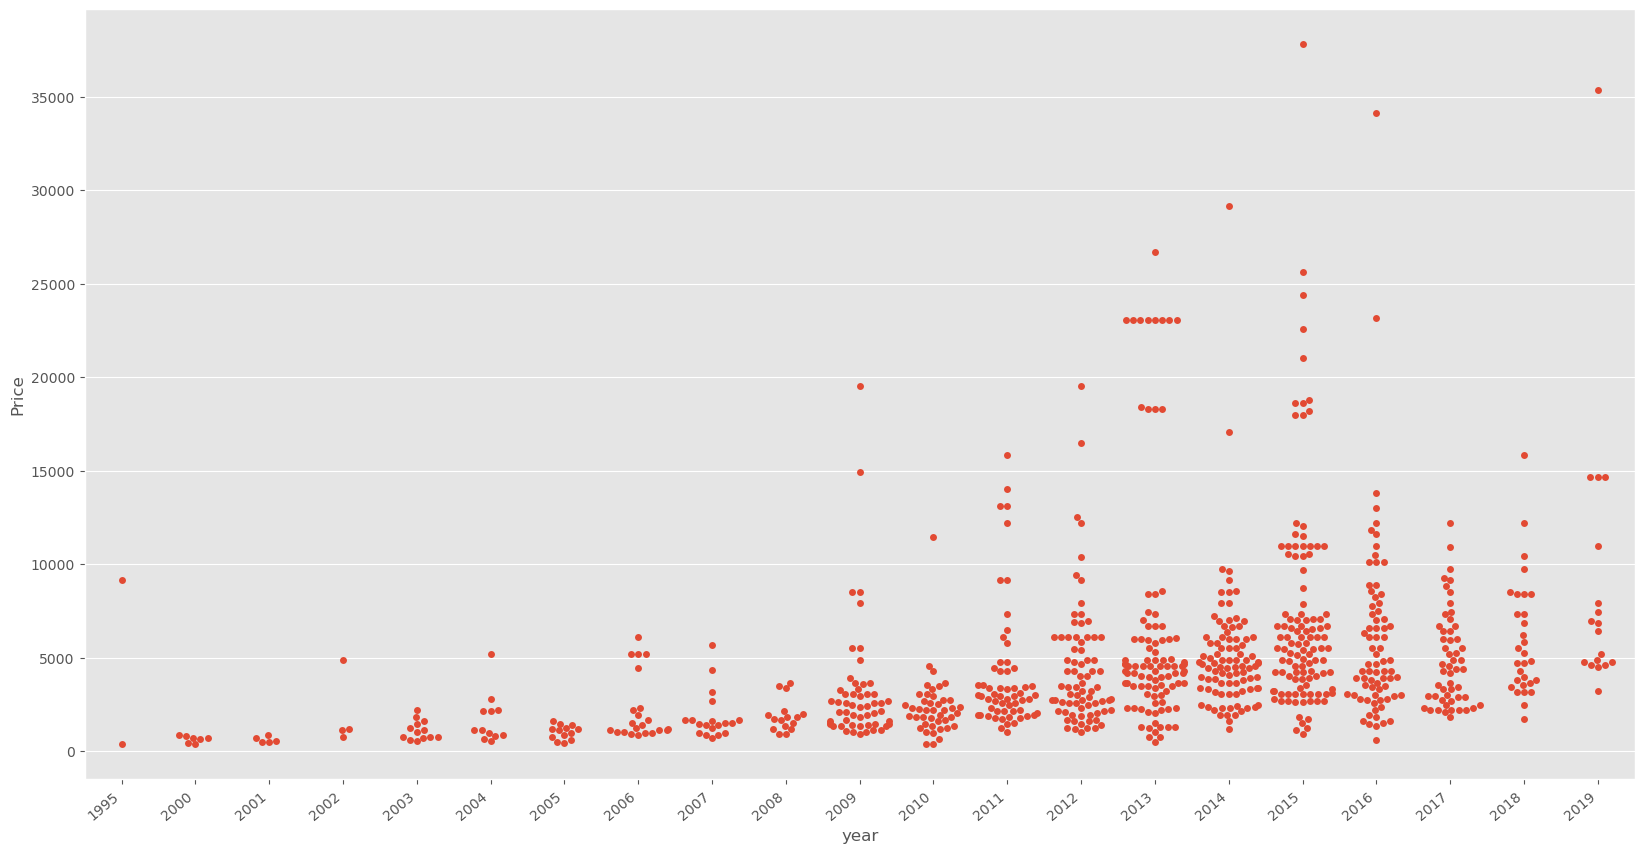

In [28]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

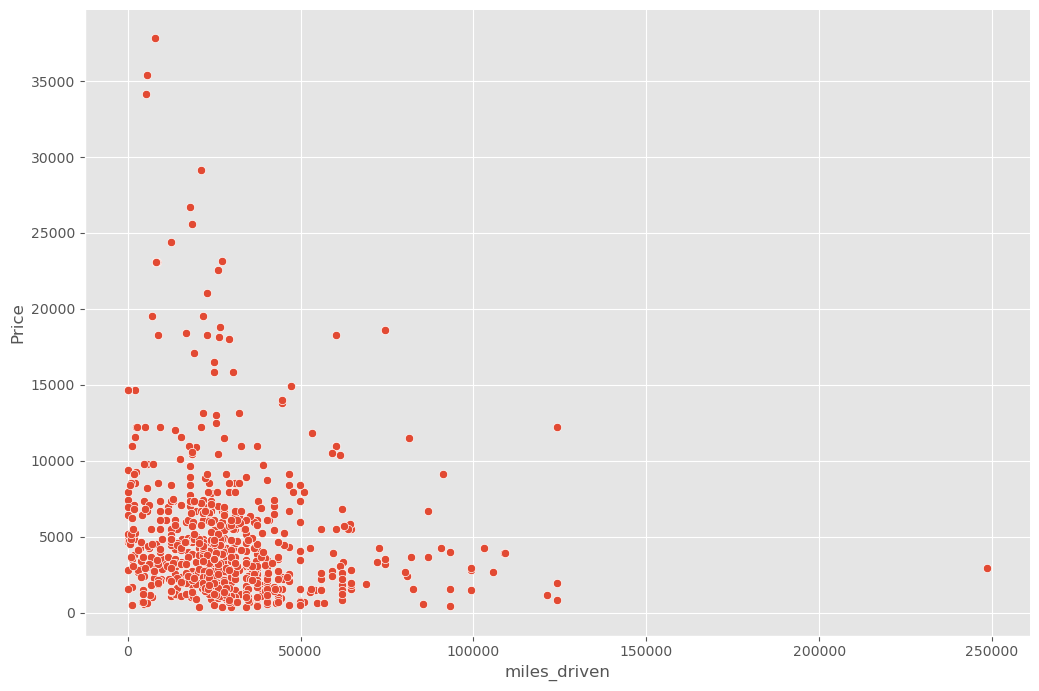

In [29]:
sns.relplot(x='miles_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

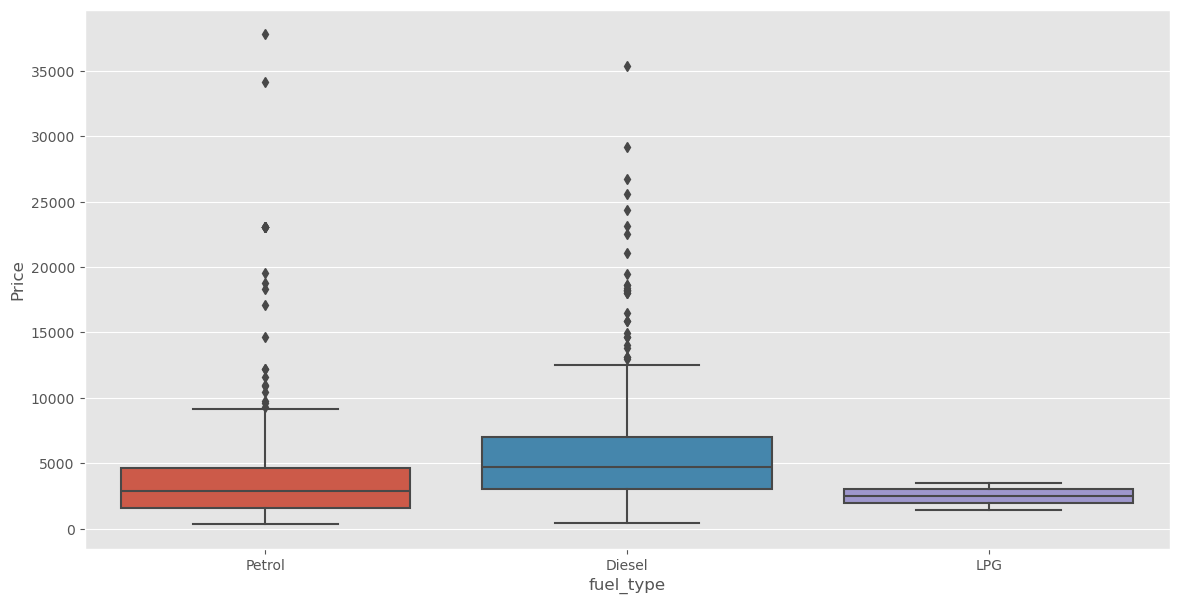

In [30]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

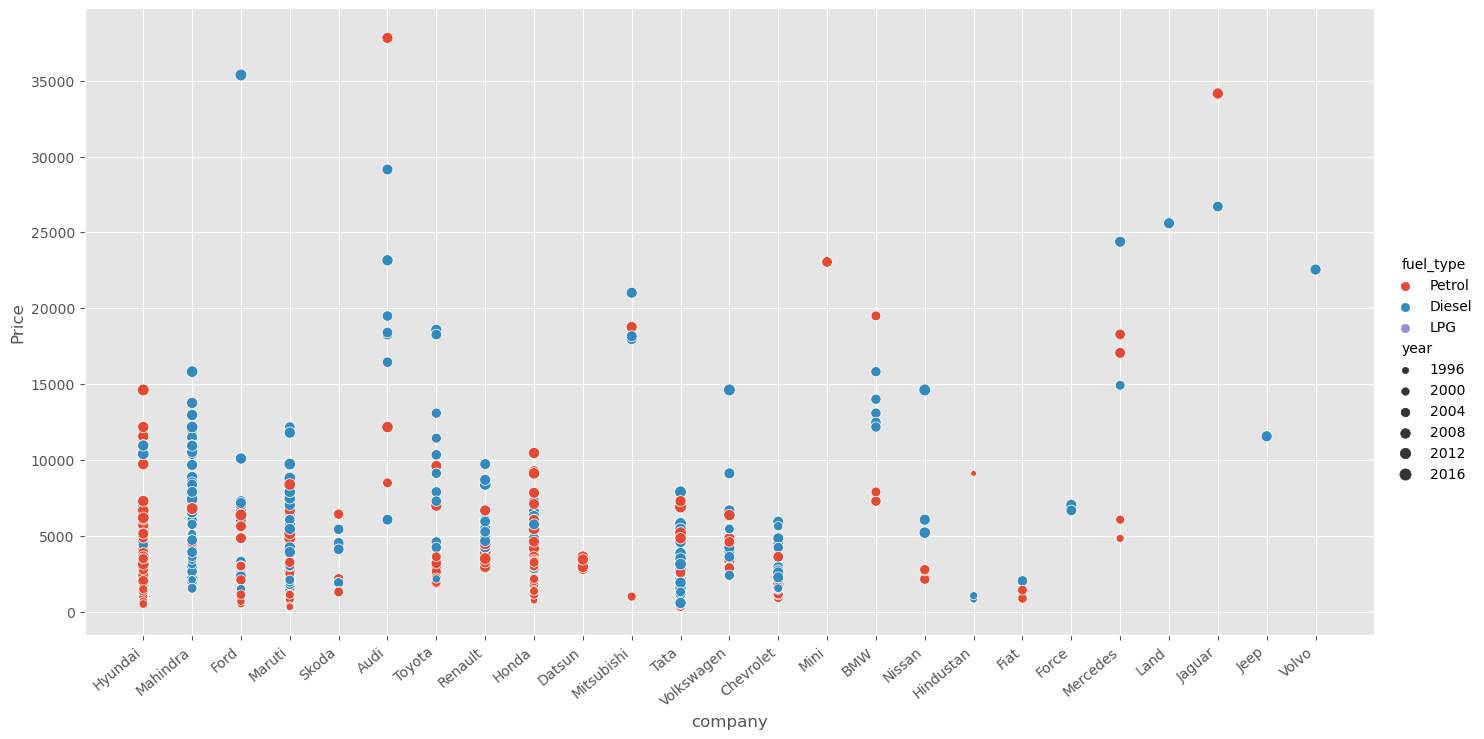

In [31]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [32]:
X=car[['name','company','year','miles_driven','fuel_type']]
y=car['Price']

In [33]:
X

,name,company,year,miles_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,27961,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,24,Diesel
2,Hyundai Grand i10,Hyundai,2014,17398,Petrol
3,Ford EcoSport Titanium,Ford,2014,22369,Diesel
4,Ford Figo,Ford,2012,25476,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,31068,Petrol
812,Tata Indica V2,Tata,2009,18641,Diesel
813,Toyota Corolla Altis,Toyota,2009,82020,Petrol
814,Tata Zest XM,Tata,2018,16777,Diesel


In [34]:
y.shape

(815,)

### Applying Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [38]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [39]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [40]:
lr=LinearRegression()

#### Making a pipeline

In [41]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [42]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [43]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [44]:
r2_score(y_test,y_pred)

0.5596610587712177

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [45]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [46]:
np.argmax(scores)

655

In [47]:
scores[np.argmax(scores)]

0.915588940443236

In [48]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([5571.92230214])

#### The best model is found at a certain random state 

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.915588940443236

In [50]:
import pickle

In [51]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [52]:
pipe.predict(pd.DataFrame(columns=['name','company','year','miles_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([5716.49805597])

In [53]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese